<!-- Notebook Header Start -->

<h1 align="center">Running Kilosort & Analyzing Data</h1>

<p align="center">
  <strong>Author:</strong> Karl Bates<br>
  <strong>Date:</strong> 2024-11-18<br>
  <strong>Affiliation:</strong> Carnegie Mellon University, Cohen-Karni Lab  || Neuromechatronics Lab
</p>

---


## 📊 Notebook Outline

* **Importing binary files from SpikeInterface**
* **Running Kilosort spike sorting on the datasets of interest**
* **Importing the results of Kilosort back into Python for analysis / plotting**


## 📚 References & Additional Resources

- [Kilosort4 docs](https://github.com/MouseLand/Kilosort/tree/main)
- [SpikeInterface docs](https://github.com/SpikeInterface)

---

<!-- Notebook Header End -->


# 🧾 Importing Libraries & Data
---

### import libraries

In [ ]:
# standard imports
from pathlib import Path
import os
import pandas as pd
import numpy as np
from kilosort import io
import matplotlib.pyplot as plt

# custom imports
from automations import RM1
from automations import SpikeInterface_wrapper
from automations import Kilosort_wrapper
from automations import plots

### filepath & probe definition

Using the spreadsheet, `Adapter_pinout.xlsx`, the contact ID's can be traced to the "device channel", and we can assign them on the probe. 

In this case, our channel indices correspond to the aux inputs to the intan headstage.

refer to the notebook, `RM1_pipeline.ipynb` within  the `dev_notebook` folder

In [2]:
# Path definitions
SAVE_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
DATA_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# Create path if it doesn't exist
DATA_DIRECTORY.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY.mkdir(parents=True, exist_ok=True)
PROBE_DIRECTORY = Path(r'D:\Data\CMU.80 Data\88 Analyzed Data\88.001 A1x32-Edge-5mm-20-177-A32\A1x32-Edge-5mm-20-177-A32.prb')

# 📈 Trial Summary
---

This is used to determine which trial is most likely to produce good units in a spike sorting analysis

### process data for import into Kilosort

I will use a combination of `SpikeInterface` & `Kilosort.io.extractors` to get the data I need

In [3]:
spikes = Kilosort_wrapper(SAVE_DIRECTORY,PROBE_DIRECTORY)

Preparing Kilosort wrapper...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\VF_8_241125_161626\DW327_VF_8_241125_161626_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------


|
|
|
|
|
|
Running kilosort on VF_8_241125_161626
|
|
|
|
|
|


kilosort.run_kilosort: N samples: 7308032
kilosort.run_kilosort: N seconds: 243.60106666666667
kilosort.run_kilosort: N batches: 122
kilosort.run_kilosort: Preprocessing filters computed in  0.44s; total  0.44s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    18.40 %
kilosort.run_kilosort: Memory:       37.14 %     |     17.80   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   14.22 %     |      1.14   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     1.47 %     |      0.12   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kil

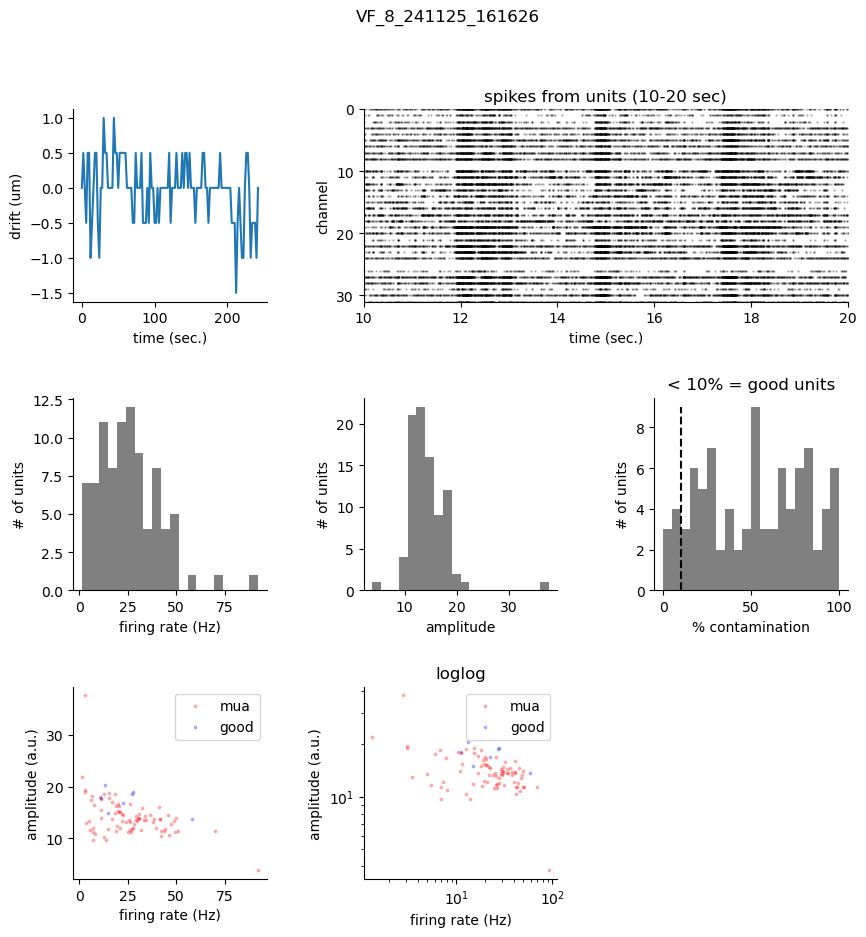

ERROR: could not plot units for VF_8_241125_161626, good. skipping plot...
ERROR: could not plot units for VF_8_241125_161626, mua. skipping plot...


<Figure size 1800x450 with 0 Axes>

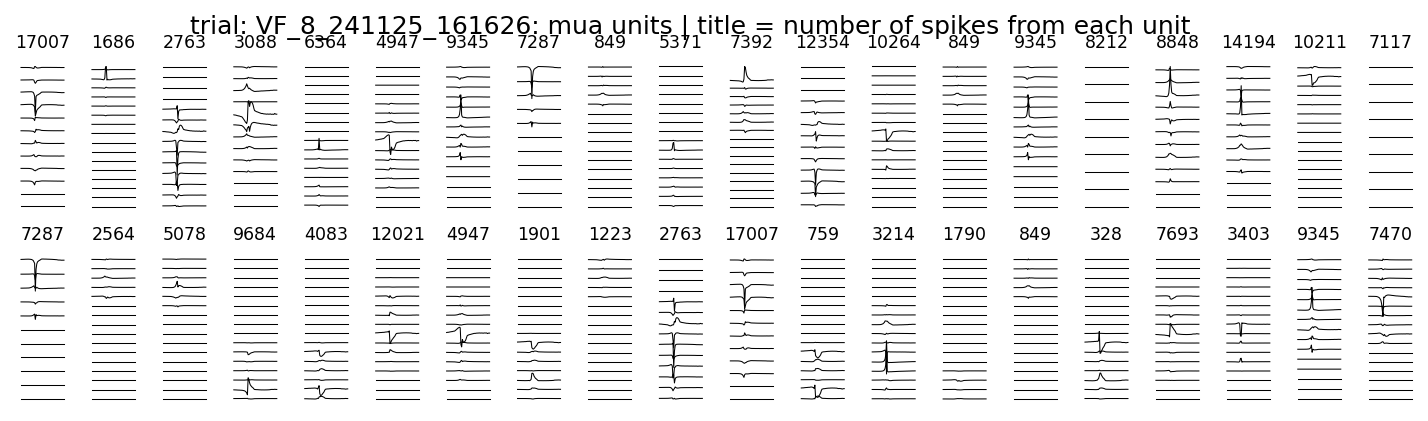

In [4]:
spikes.run_kilosort_trial_summary()

# ⏩ Import Kilosort Outputs (if they exist)

when kilosort is run, it creates a series of files saved next to the binary files.
use this method to import them. if there are no kilosort files, it will pass

In [5]:
spikes = Kilosort_wrapper(SAVE_DIRECTORY,PROBE_DIRECTORY)

Preparing Kilosort wrapper...


In [6]:
spikes.extract_kilosort_outputs()

- **`ops`**: Loads the Kilosort options dictionary, which includes parameters and processing information.
- **`cluster_amplitudes` & `contamination_percentage`**: Load cluster amplitudes and contamination percentages from TSV files.
- **`channel_mapping`**: Loads the mapping of electrode channels.
- **`templates`**: Loads the spike waveform templates.
- **`chan_best`**: Identifies the best (most representative) channel for each template by finding the channel with the maximum energy (sum of squared amplitudes).
- **`amplitudes`**: Loads the amplitudes of detected spikes.
- **`spike_times`**: Loads spike times, typically in sample indices.
- **`spike_clusters`**: Loads cluster assignments for each spike.
- **`firing_rates`**: Calculates the firing rate for each unit (cluster) by counting the number of spikes and normalizing by the total recording time.
- **`dshift`**: Extracts the drift shift values from the options dictionary, which indicates the movement of the recording probe over time.

In [7]:
st = spikes.kilosort_results["VF_8_241125_161626"]["spike_times"]
clu = spikes.kilosort_results["VF_8_241125_161626"]["spike_clusters"]
templates = spikes.kilosort_results["VF_8_241125_161626"]["templates"]
chan_map = spikes.kilosort_results["VF_8_241125_161626"]["channel_mapping"]
chan_best = spikes.kilosort_results["VF_8_241125_161626"]["chan_best"]

# 📊 Example: Pretty Raster Plot

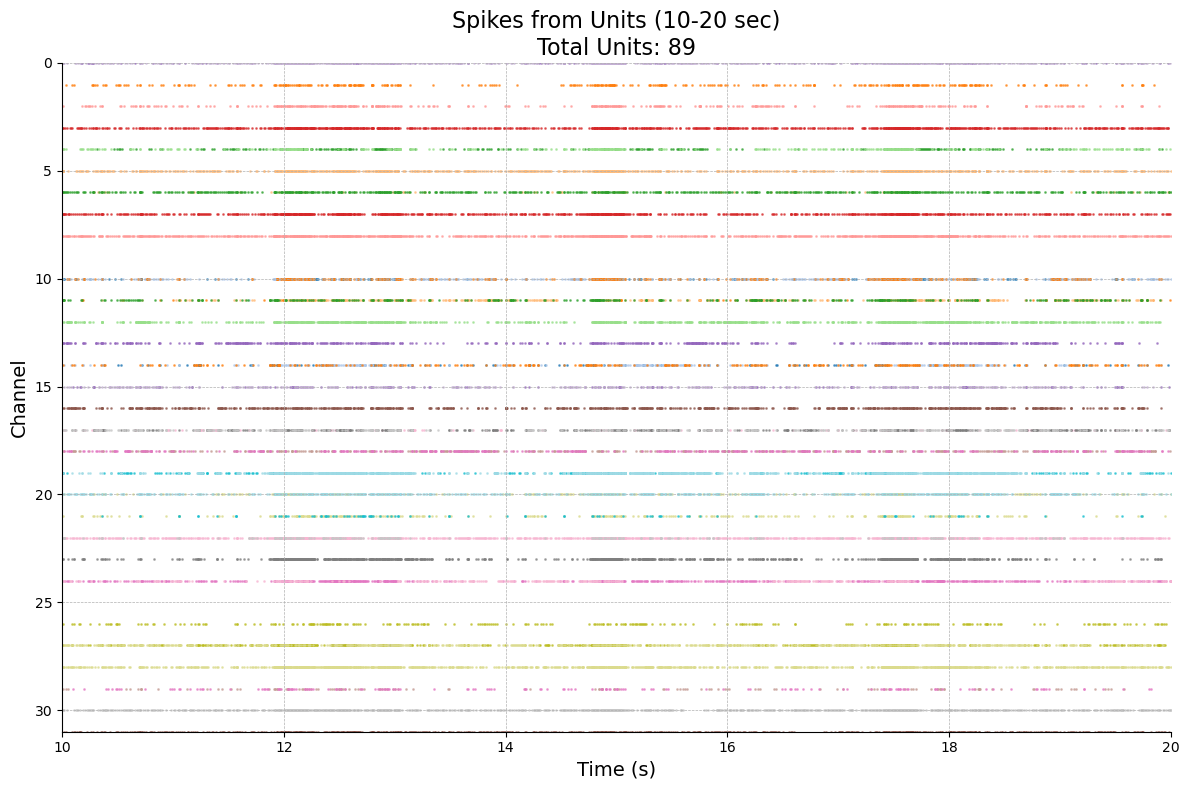

In [ ]:
# Define the specific time window in seconds
time_window_start = 10  # Start time in seconds
time_window_end = 20    # End time in seconds

# Convert the time window to indices
t_start_index = np.searchsorted(st, time_window_start * 30000)  # Convert to sample index
t_end_index = np.searchsorted(st, time_window_end * 30000)

# Extract spike times and corresponding channels within the time window
spike_times = st[t_start_index:t_end_index] / 30000.  # Convert to seconds
spike_clusters = clu[t_start_index:t_end_index]
spike_channels = chan_best[spike_clusters]

# Create a figure with a larger size for better visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Use a colormap to represent different units or clusters
clusters = np.unique(spike_clusters)
num_clusters = len(clusters)
cmap = plt.get_cmap('tab20', num_clusters)

# Map each cluster to a color
cluster_colors = {cluster: cmap(i) for i, cluster in enumerate(clusters)}

# Plot spikes for each cluster with its assigned color
for cluster in clusters:
    idx = spike_clusters == cluster
    ax.scatter(spike_times[idx], spike_channels[idx],
               s=1, color=cluster_colors[cluster], alpha=0.6)

# Set x-axis limits to the specified time window
ax.set_xlim([time_window_start, time_window_end])
ax.set_ylim([chan_map.max(), chan_map.min()])
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Channel', fontsize=14)
ax.set_title(f'Spikes from Units ({time_window_start}-{time_window_end} sec)\nTotal Units: {num_clusters}', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
